<a href="https://colab.research.google.com/github/nabarahim/AFIB-and-MI-Correlation/blob/main/MITBIH_dataset%2BFeature%20Engineering%2B%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
import scipy.io.wavfile
import scipy.signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_mitbih_train = pd.read_csv('/content/drive/MyDrive/ECG/mitbih_train.csv', header=None)
df_mitbih_test = pd.read_csv('/content/drive/MyDrive/ECG/mitbih_test.csv', header=None)
df = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB
None


In [ ]:
# mitbih+ptbdb
M = df.values
X= M[:,:-1]
y = M[:,-1]

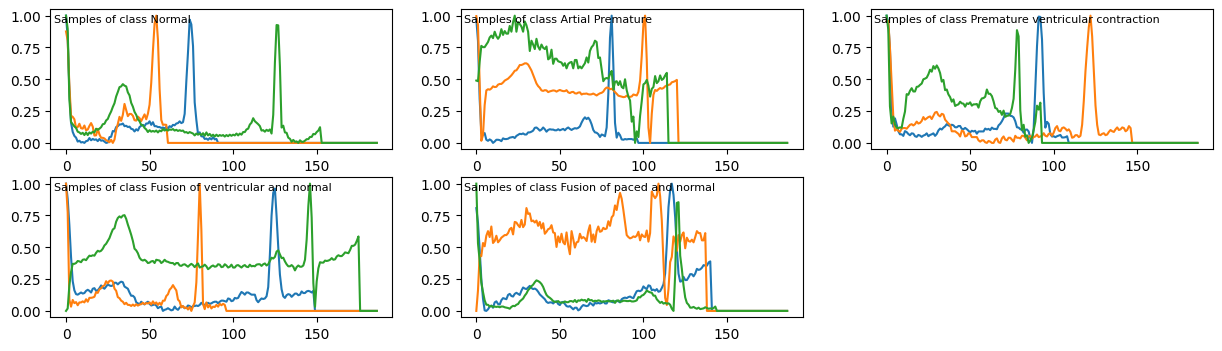

In [ ]:
classes={0:"Normal",
         1:"Artial Premature",
         2:"Premature ventricular contraction",
         3:"Fusion of ventricular and normal",
         4:"Fusion of paced and normal"}
plt.figure(figsize=(15,4))
for i in range(0,5):
    plt.subplot(2,3,i + 1)
    all_samples_indexes = np.where(y == i)[0]
    rand_samples_indexes = np.random.randint(0, len(all_samples_indexes), 3)
    rand_samples = X[rand_samples_indexes]
    plt.plot(rand_samples.transpose())
    plt.title("Samples of class " + classes[i], loc='left', fontdict={'fontsize':8}, x=0.01, y=0.85)

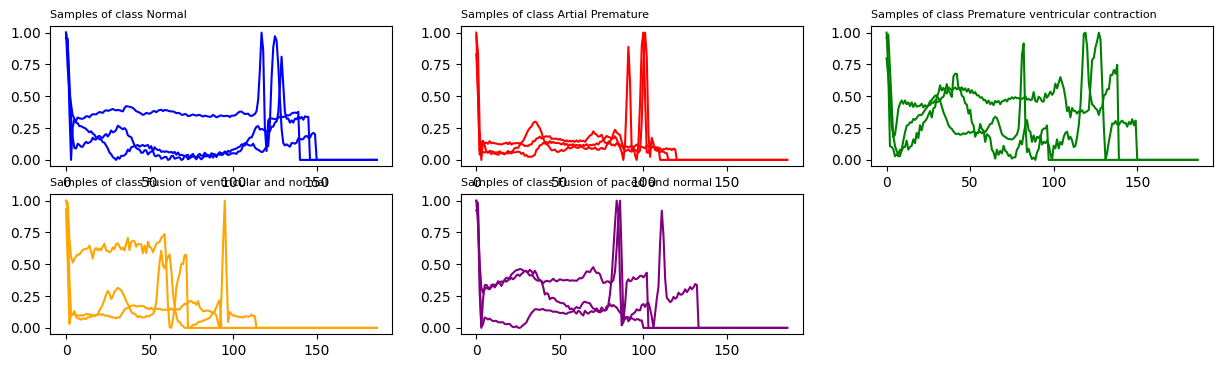

In [ ]:
colors = ['blue', 'red','green' ,'orange', 'purple']  # Specify the colors for each class
classes = {0:"Normal",
           1:"Artial Premature",
           2:"Premature ventricular contraction",
           3:"Fusion of ventricular and normal",
           4:"Fusion of paced and normal"}

plt.figure(figsize=(15,4))
for i in range(0,5):
    plt.subplot(2,3,i + 1)
    all_samples_indexes = np.where(y == i)[0]
    rand_samples_indexes = np.random.randint(0, len(all_samples_indexes), 3)
    rand_samples = X[rand_samples_indexes]
    for j in range(3):
        plt.plot(rand_samples[j].transpose(), color=colors[i])  # Set the color for each signal
    plt.title("Samples of class " + classes[i], loc="left", fontdict={'fontsize': 8})

plt.show()

In [ ]:
x = np.where(df[187]>0)
df[187].iloc[x] = 1

repartition = df[187].astype(int).value_counts()
print(repartition)

0    90589
1    18857
Name: 187, dtype: int64


**Denosing using Butterworth**

In [ ]:
signal_df = pd.DataFrame(df)

In [ ]:
signal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Original MITBIH dataset')

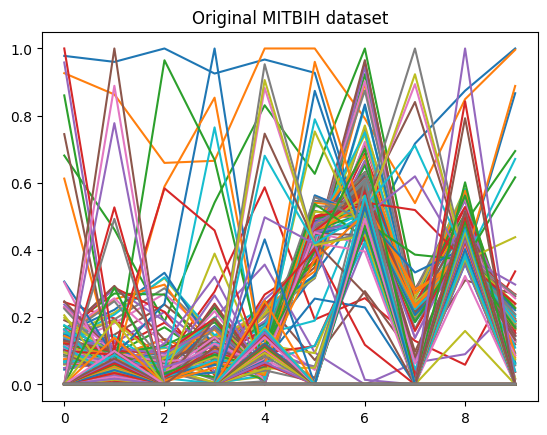

In [ ]:
plt.plot(signal_df[0:10])
plt.title('Original MITBIH dataset')

In [ ]:
df.shape

(109446, 188)

**Denosing using Butterworth**

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs

In [ ]:
from scipy.signal.signaltools import filtfilt
def butter_lowpass(data,cutoff, sample_rate, order=2):
   b, a = butter_lowpass(cutoff = 2, sample_rate = 100, order = 2)
#   b, a = butter_lowpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
   nyq = 0.5 * sample_rate
   normal_cutoff = cutoff / nyq
   b, a = butter(order, normal_cutoff, btype='low', analog=False)
   y = lfilter(b, a, signal_df)
   return y

<ipython-input-14-43c2dedad0b0>:1: DeprecationWarning: Please use `filtfilt` from the `scipy.signal` namespace, the `scipy.signal.signaltools` namespace is deprecated.
  from scipy.signal.signaltools import filtfilt


In [ ]:
fs = 50.0       # sample rate, Hz
cutoff = 3    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 2 Hz
order = 2       # sin wave can be approx represented as quadratic
def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,signal_df)
    return y

In [ ]:
filter = butter_lowpass_filter(signal_df, cutoff, fs, order)

Cutoff freq 3


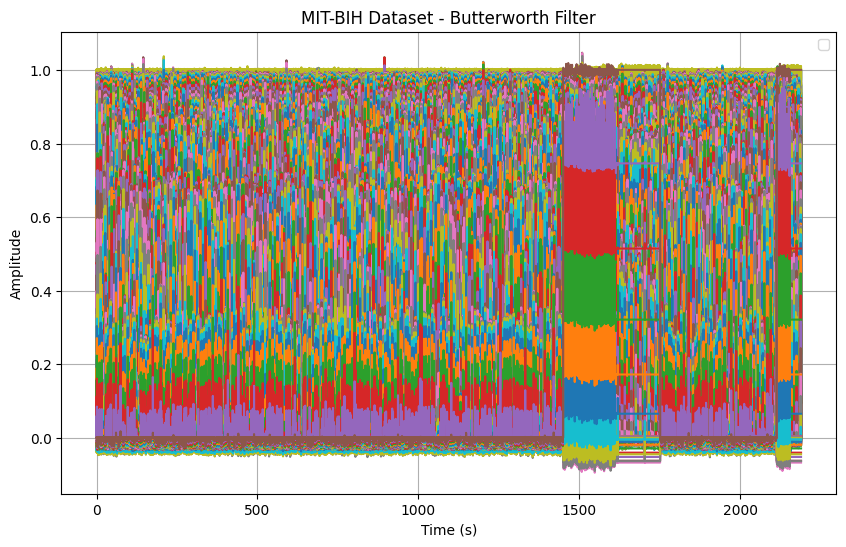

In [ ]:
# Plot the original and filtered signals
time = np.arange(len(signal_df)) / fs

plt.figure(figsize=(10, 6))
plt.plot(time, signal_df)
plt.plot(time, filter)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('MIT-BIH Dataset - Butterworth Filter')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


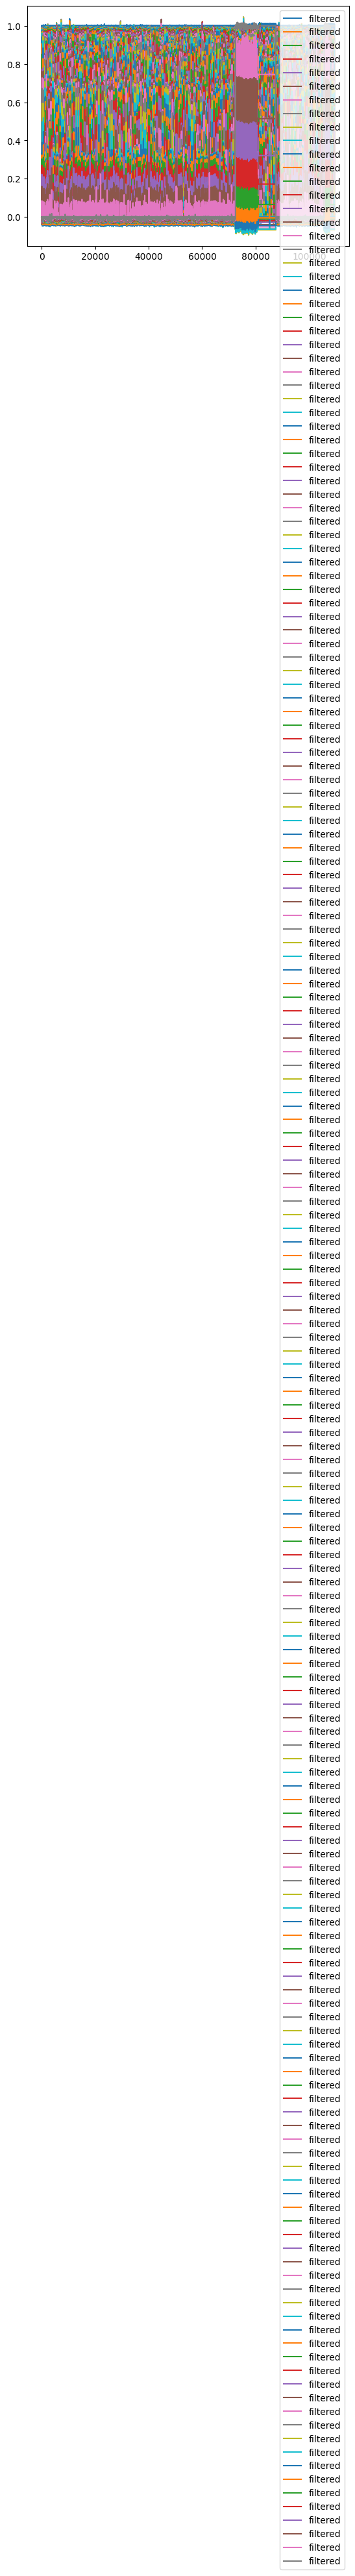

In [ ]:
plt.plot(filter,label="filtered")
plt.legend()
plt.show()

**Pan Tompkins Segment**

In [ ]:
# Convert the dataset to a NumPy array
data = np.array(filter)

In [ ]:
# def pan_tompkins(data):
#   """
#   Applies the Pan-Tompkins algorithm to a signal.

#   Args:
#     data: The signal to be analyzed.

#   Returns:
#     The fundamental frequency of the signal, and the times of the peaks.
#   """

#   # Define the filter coefficients
#   cutoff_frequency = 0.5
#   order = 2
#   b, a = butter(order, cutoff_frequency, btype='low')

#   # Filter the signal
#   filtered_data = lfilter(b, a, data)

#   # Apply the Hilbert transform
#   analytic_signal = scipy.signal.hilbert(filtered_data)

#   # Calculate the squared magnitude of the analytic signal
#   squared_magnitude = np.abs(analytic_signal)**2

#   # Find the peaks in the squared magnitude
#   peak_indices = np.argmax(squared_magnitude)

#   # Calculate the fundamental frequency
#   f0 = np.array([60 / (peak_indices[1] - peak_indices[0])])

#   # Return the fundamental frequency and the times of the peaks
#   return f0, peak_indices

In [ ]:
# # def pan_tompkins(data):
#   """
#   Applies the Pan-Tompkins algorithm to a signal.

#   Args:
#     data: A NumPy array of the signal data.

#   Returns:
#     A tuple of the peak locations and the peak heights.
#   """

#   # Compute the first derivative of the signal.
#   ddata = np.diff(data)

#   # Compute the squared magnitude of the derivative.
#   mdata = ddata**2

#   # Compute the Hilbert transform of the squared magnitude.
#   hdata = np.imag(scipy.signal.hilbert(mdata))

#   # Compute the threshold.
#   threshold = 0.2 * np.std(hdata)

#   # Find the peaks in the Hilbert transform.
#   peaks = np.where(hdata > threshold)[0]

#   # Return the peak locations and the peak heights.
#   return peaks, hdata[peaks]

In [ ]:
# # Apply the Pan-Tompkins algorithm
# peaks, _ = pan_tompkins(data)

In [ ]:
# # Plot the results in wavelet signal form
# plt.figure()
# # plt.plot(data)
# plt.plot(peaks)
# plt.title('Pan-Tompkins algorithm applied to MITBIH dataset')
# plt.xlabel('Time (s)')
# plt.ylabel('RRI (ms)')
# plt.show()

**Normalization using MinMax**

In [ ]:
# # Min-max normalize the peaks
# peaks_norm = (peaks - np.min(peaks)) / (np.max(peaks) - np.min(peaks))

In [ ]:
# # Standard scale standardize the peaks
# peaks_std = (peaks - np.mean(peaks)) / np.std(peaks)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filter)

In [ ]:
# Standardize the data
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(normalized_data)

**Feature Scaling using PCA**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for feature scaling
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(standardized_data)

**Plotting**

Text(0.5, 1.0, 'Original Data')

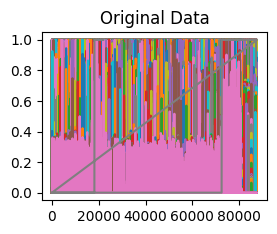

In [ ]:
import matplotlib.pyplot as plt

# Display the original data
plt.subplot(2, 2, 1)
plt.plot(df)
plt.title('Original Data')

Text(0.5, 1.0, 'Denoised Data')

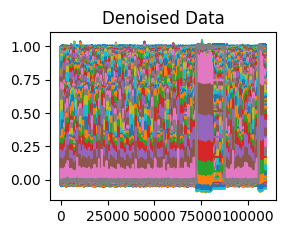

In [ ]:
import matplotlib.pyplot as plt

# Display the denoised data
plt.subplot(2, 2, 1)
plt.plot(filter)
plt.title('Denoised Data')

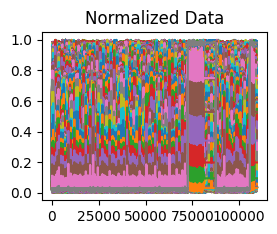

Text(0.5, 1.0, 'Standardized Data')

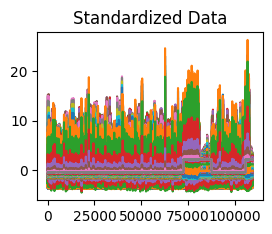

In [ ]:
import matplotlib.pyplot as plt


# Display the normalized data
plt.subplot(2, 2, 1)
plt.plot(normalized_data)
plt.title('Normalized Data')
plt.show()

# Display the standardized data
plt.subplot(2, 2, 2)
plt.plot(standardized_data)
plt.title('Standardized Data')


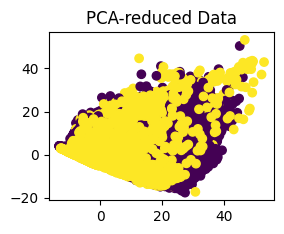

In [ ]:
# Display the PCA-reduced data
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA-reduced Data')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.15)

In [ ]:
X_train.shape
X_test.shape

(16417, 10)

In [ ]:
y_train.shape
y_test.shape

(16417,)

**Apply CNN**

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Activation, Add, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# Build the CNN model
model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, Activation, Add, Dense, Flatten
# input_shape = (188, 1)

# def make_model(final_layer_size=5):
#     I = Input(input_shape)
#     C = Conv1D(filters=32, kernel_size=5)(I)

#     C11 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(C)
#     C12 = Conv1D(filters=32, kernel_size=5, padding='same')(C11)
#     A11 = Add()([C, C12])
#     R11 = Activation(activation='swish')(A11)
#     M11 = MaxPool1D(pool_size=5, strides=2)(R11)

#     C21 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M11)
#     C22 = Conv1D(filters=32, kernel_size=5, padding='same')(C21)
#     A21 = Add()([M11, C22])
#     R21 = Activation(activation='swish')(A21)
#     M21 = MaxPool1D(pool_size=5, strides=2)(R21)

#     C31 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M21)
#     C32 = Conv1D(filters=32, kernel_size=5, padding='same')(C31)
#     A31 = Add()([M21, C32])
#     R31 = Activation(activation='swish')(A31)
#     M31 = MaxPool1D(pool_size=5, strides=2)(R31)

#     C41 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M31)
#     C42 = Conv1D(filters=32, kernel_size=5, padding='same')(C41)
#     A41 = Add()([M31, C42])
#     R41 = Activation(activation='swish')(A41)
#     M41 = MaxPool1D(pool_size=5, strides=2)(R41)

#     C51 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M41)
#     C52 = Conv1D(filters=32, kernel_size=5, padding='same')(C51)
#     A51 = Add()([M41, C52])
#     R51 = Activation(activation='swish')(A51)
#     M51 = MaxPool1D(pool_size=5, strides=2)(R51)

#     F1 = Flatten()(M51)
#     D1 = Dense(32)(F1)
#     R1 = Activation(activation='swish')(D1)
#     D2 = Dense(32)(R1)
#     D3 = Dense(final_layer_size)(D2)

#     O = Activation(activation='softmax')(D3)

#     return Model(inputs=I, outputs=O)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.010, decay_steps=10000, decay_rate=0.75)
adam = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# n_classes_mitbih = len(np.unique(y))
# model = make_model(n_classes_mitbih)
# model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy',f1_score])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_score])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 64)            256       
                                                                 
 conv1d_3 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1472)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                94272     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
1454/1454 [==============================] - 11s 8ms/step - loss: 5.9425e-04 - accuracy: 0.9999 - f1_score: 0.9998 - val_loss: 4.5998e-05 - val_accuracy: 1.0000 - val_f1_score: 0.9981
Epoch 2/25
1454/1454 [==============================] - 11s 8ms/step - loss: 6.1418e-06 - accuracy: 1.0000 - f1_score: 1.0000 - val_loss: 1.1385e-06 - val_accuracy: 1.0000 - val_f1_score: 0.9981
Epoch 3/25
 272/1454 [====>.........................] - ETA: 7s - loss: 3.4496e-07 - accuracy: 1.0000 - f1_score: 1.0000

KeyboardInterrupt: ignored

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print(f"The testing set contains {counts[0]} normal recordings and {counts[1]} with myocardial infarction.\nLet's compute the confusion matrix.")

In [ ]:
def plot_learning(history):
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'], label = "val_accuracy")
    plt.title('model accuracy')
    plt.legend(["accuracy", "val_accuracy"])
    plt.show()
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title('model loss')
    plt.legend(["loss", "val_loss"])
    plt.show()
    plt.subplot(211)
    plt.plot(history.history['f1_score'])
    plt.plot(history.history['val_f1_score'], label = "val_f1_score")
    plt.title('model f1-score')
    plt.legend(["f1_score", "val_f1_score"])
    plt.show()

In [ ]:
plot_learning(history)

In [ ]:
results = model.evaluate(np.expand_dims(X_test, axis=2), y_test, batch_size=32)
print(f"The accuracy on the testing set is {np.round(results[1]*100,1)}%")

In [ ]:
# y_pred = model.predict(np.expand_dims(X_test, axis=2))
# y_pred_ptbdb_bool = np.argmax(y_pred, axis=1)
# print(classification_report(y_test, y_pred_ptbdb_bool))

# confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_ptbdb_bool)
# print(f"Confusion matrix :\n {confusion_matrix}")


In [ ]:
# print(f"{confusion_matrix[0][0]}/{counts[0]} MI were correctly classified")

# print(f"{confusion_matrix[1][1]}/{counts[1]} normal beats were correctly classified")

# print(f"{confusion_matrix[1][0]} beats were classified as MI")

# print(f"{confusion_matrix[0][1]} MI were classified as normal")

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(np.expand_dims(X_test, axis=2))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)